# Part I - (Dataset Exploration Title)
## by (Ayomide Adenuga)

## Introduction
> This document explores a dataset containing loan lists from 2005 Q4 till 2014 Q1 through 81 variables classified into 3 category





## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
df = pd.read_csv('prosperLoanData.csv')

df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

## The columns in the dataset is too much, 

- Extraneous columnns will be dropped

In [5]:
# the columns that will be used in the analysis will be selected and stored as 'cols'
# features of interest
cols = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade', 'Term', 'LoanStatus', 'ClosedDate',
       'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 'EmploymentStatus',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner','DebtToIncomeRatio', 'IncomeRange',
       'IncomeVerifiable', 'StatedMonthlyIncome', 'LoanOriginalAmount','LoanOriginationDate',
       'LoanOriginationQuarter', 'MonthlyLoanPayment', 'DateCreditPulled', 'LoanOriginationQuarter']

df_loan = df[cols].copy()

In [6]:
# A check to ascertain if the column as been selected
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,DateCreditPulled,LoanOriginationQuarter
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,0.17,"$25,000-49,999",True,3083.333333,9425,2007-09-12 00:00:00,Q3 2007,330.43,2007-08-26 18:41:46.780000000,Q3 2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.18,"$50,000-74,999",True,6125.000000,10000,2014-03-03 00:00:00,Q1 2014,318.93,2014-02-27 08:28:14,Q1 2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,0.06,Not displayed,True,2083.333333,3001,2007-01-17 00:00:00,Q1 2007,123.32,2007-01-02 14:09:10.060000000,Q1 2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,0.15,"$25,000-49,999",True,2875.000000,10000,2012-11-01 00:00:00,Q4 2012,321.45,2012-10-22 11:02:32,Q4 2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,0.26,"$100,000+",True,9583.333333,15000,2013-09-20 00:00:00,Q3 2013,563.97,2013-09-14 18:38:44,Q3 2013


## Fill missing value with mean

In [7]:
# Filling missing values with mean
df_loan['BorrowerAPR'] = df_loan['BorrowerAPR'].fillna(df_loan['BorrowerAPR'].mean())

df_loan['ProsperRating (numeric)'] = df_loan['ProsperRating (numeric)'].fillna(df_loan['ProsperRating (numeric)'].mean())

df_loan['ProsperScore'] = df_loan['ProsperScore'].fillna(df_loan['ProsperScore'].mean())

df_loan['DebtToIncomeRatio'] = df_loan['DebtToIncomeRatio'].fillna(df_loan['DebtToIncomeRatio'].mean())

In [8]:
list_dict = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].map(list_dict)
df_loan.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

## Convert date column datetime data type

In [9]:
# convert column with date to datetime

df_loan['ListingCreationDate'] = pd.to_datetime(df_loan['ListingCreationDate'])      

df_loan['ClosedDate'] = pd.to_datetime(df_loan['ClosedDate'])

df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])

df_loan['DateCreditPulled'] = pd.to_datetime(df_loan['DateCreditPulled'])

### Extract year from Loan origination date and Listing creation date

In [10]:
# Extract year information from ListingCreationDate column
df_loan['year']= df_loan['LoanOriginationDate'].dt.year
df_loan['Listyear'] = df_loan['ListingCreationDate'].dt.year

In [11]:
df_loan.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MonthlyLoanPayment,DateCreditPulled,LoanOriginationQuarter,ListingCategory,year,Listyear
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,3083.333333,9425,2007-09-12,Q3 2007,330.43,2007-08-26 18:41:46.780,Q3 2007,Not Available,2007,2007
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,6125.000000,10000,2014-03-03,Q1 2014,318.93,2014-02-27 08:28:14.000,Q1 2014,Home Improvement,2014,2014
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,2083.333333,3001,2007-01-17,Q1 2007,123.32,2007-01-02 14:09:10.060,Q1 2007,Not Available,2007,2007
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,2875.000000,10000,2012-11-01,Q4 2012,321.45,2012-10-22 11:02:32.000,Q4 2012,Motorcycle,2012,2012
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,9583.333333,15000,2013-09-20,Q3 2013,563.97,2013-09-14 18:38:44.000,Q3 2013,Home Improvement,2013,2013


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113937 non-null  object        
 1   ListingNumber             113937 non-null  int64         
 2   ListingCreationDate       113937 non-null  datetime64[ns]
 3   CreditGrade               28953 non-null   object        
 4   Term                      113937 non-null  int64         
 5   LoanStatus                113937 non-null  object        
 6   ClosedDate                55089 non-null   datetime64[ns]
 7   BorrowerAPR               113937 non-null  float64       
 8   BorrowerRate              113937 non-null  float64       
 9   LenderYield               113937 non-null  float64       
 10  ProsperRating (numeric)   113937 non-null  float64       
 11  ProsperRating (Alpha)     84853 non-null   object        
 12  Pr

### What is the structure of your dataset?

> This dataset contains 113,937 rows and 81 columns.

### What is/are the main feature(s) of interest in your dataset?

> I am intersted in the borrowers rate.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect the following to have effect on the Rate: LoanStatus, EmploymentStatus, StatedMonthlyIncome, IncomeVerifiable, DebtToIncomeRatio, and, LoanOriginalAmount

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

## Borrower Rate

- For the borrower's Rate, we will examine the distribution of 'BorrowerRate', with the histogram chart.

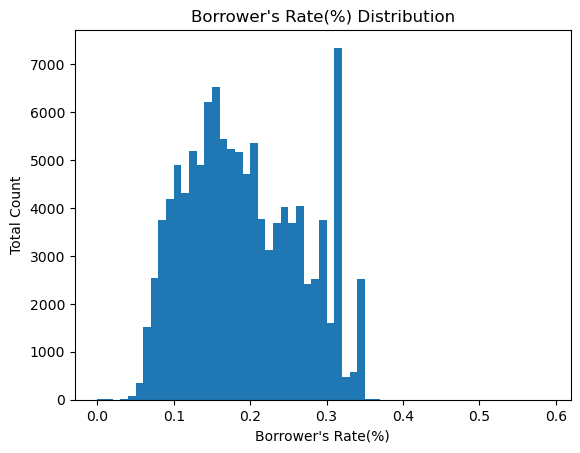

In [13]:
income_bins = np.arange(0, df_loan['BorrowerRate'].max() + 0.1, 0.01)
plt.hist(data = df_loan, x='BorrowerRate', bins = income_bins);
plt.xlabel("Borrower's Rate(%)")
plt.ylabel('Total Count')
plt.title("Borrower's Rate(%) Distribution");

- From the chart we can infer that the chart is multimodal
- It's peaked at 0.4 interest rate followed by 0.2 intrest rate

## Borrower APR

- For the borrower's APR, we will examine the distribution of 'Borrower APR', with the histogram chart.

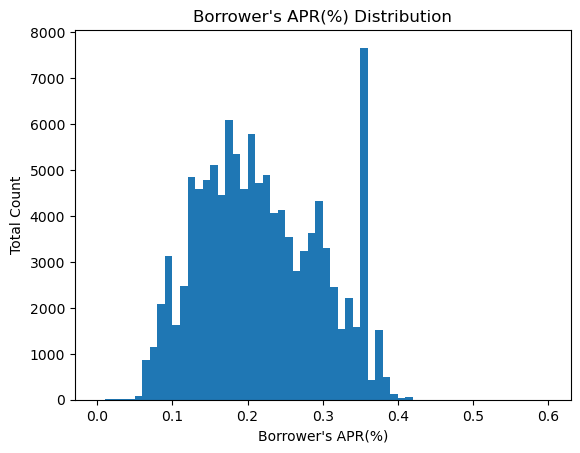

In [14]:

bins = np.arange(0, df_loan['BorrowerAPR'].max() + 0.09, 0.01)
plt.hist(data = df_loan, x='BorrowerAPR', bins = bins);
plt.xlabel("Borrower's APR(%)")
plt.ylabel('Total Count')
plt.title("Borrower's APR(%) Distribution");

* From the chart 
* The rate that with the highest count has close to 8000 

## Stated Monthly Income

- For the Stated Monthly Income, the distribution of the 'Stated Monthly Income' will be examined via histogram

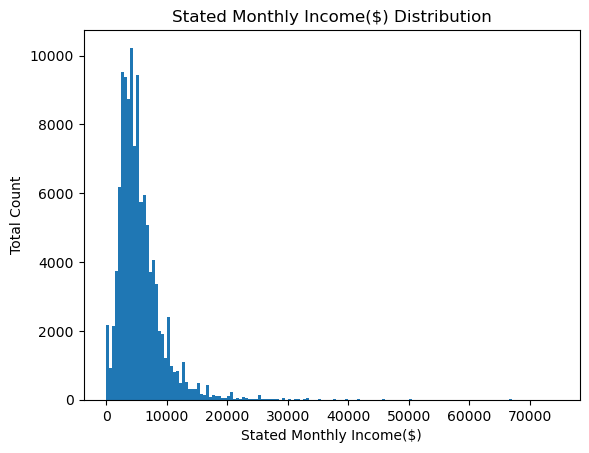

In [15]:
income_bins = np.arange(0, 75000, 500)
plt.hist(data = df_loan, x='StatedMonthlyIncome', bins = income_bins);
plt.xlabel('Stated Monthly Income($)')
plt.ylabel('Total Count')
plt.title('Stated Monthly Income($) Distribution');

- The Chart is skewed to the right

## Debt To Income Ratio 

In [16]:
df_loan.DebtToIncomeRatio.describe()

count    113937.000000
mean          0.275947
std           0.530643
min           0.000000
25%           0.150000
50%           0.230000
75%           0.310000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

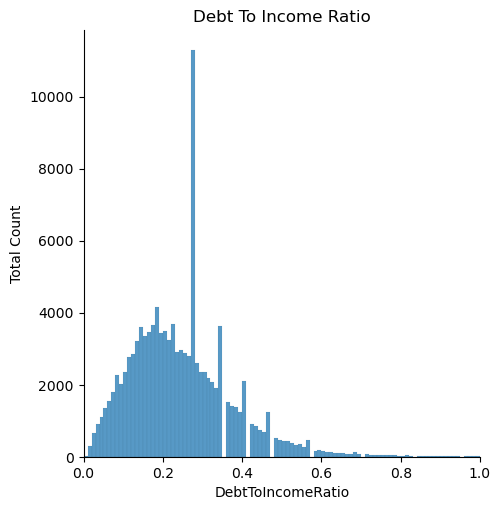

In [17]:
bins_edge = np.arange(0, df_loan['DebtToIncomeRatio'].max() + 0.01, 0.01)
sb.displot(df_loan['DebtToIncomeRatio'], kde = False, bins = bins_edge)
plt.xlim((0, 1))
plt.grid(False);
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('Total Count')
plt.title('Debt To Income Ratio');

- The Debt to income ratio is largely skewed to the right

## Loan Status

- This visualization will examine the distribution of the 'LoanStatus'

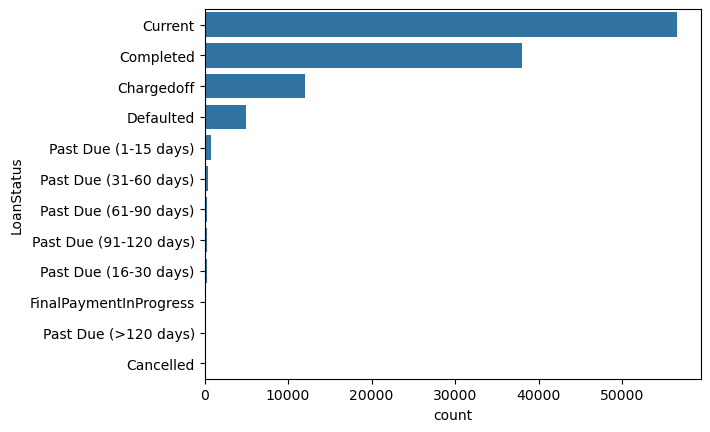

In [18]:
base_color = sb.color_palette()[0]
type_counts = df_loan['LoanStatus'].value_counts()
type_order = type_counts.index
sb.countplot(data = df_loan, y = 'LoanStatus', color = base_color, order =type_order);

* We can infer from the chart that the Borrower's are predominantly living up to their responsibility.
* People still repaying their loan are the highest follwed by those that have completed paying.

## Listing Category

- For the listing category we will examine why the borrower took the loan.

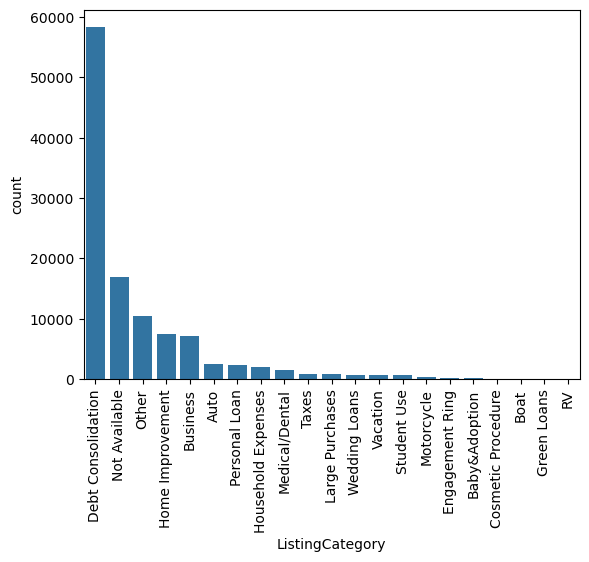

In [19]:
base_color = sb.color_palette()[0]
type_counts = df_loan['ListingCategory'].value_counts()
type_order = type_counts.index
sb.countplot(data = df_loan, x = 'ListingCategory', color = base_color, order =type_order)
plt.xticks(rotation = 90);

* It can be easily ascertained that the purpose of taking loan is to consolidate debt.
* Most often than not, people consolidate debt to raise credit score.

## Employment Status 

- For this visual, we will examine how employment status were distributed

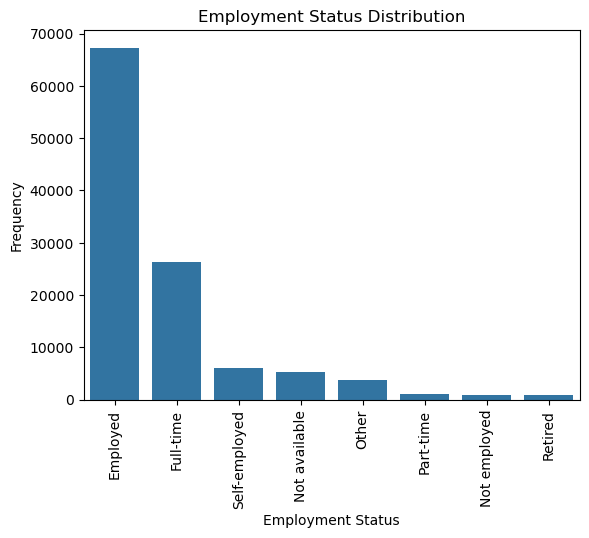

In [20]:
base_color = sb.color_palette()[0]
type_counts = df_loan['EmploymentStatus'].value_counts()
type_order = type_counts.index
sb.countplot(data = df_loan, x = 'EmploymentStatus', color = base_color, order =type_order)
plt.xticks(rotation = 90)
plt.title('Employment Status Distribution')
plt.xlabel('Employment Status')
plt.ylabel('Frequency');

* From the chart, loans in this order
* Employed
* Full-time
* Self- Employed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable that I am interested in is Borrower Rate. taking a closer look at the plot plot, we can see that the distribution looks multimodal with highest peaks at 0.4, followed by the peak at 0.2. Afterward, it goes on a downward trend with a peak at 0.3.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> `Borrower Rate` The distriribution of Borrower rate is multimodial

> `Borrower APR` The distriribution of Borrower APR is multimodial

> `Stated monthly Income` The distribution of stated monthly income is right-skewed. Many of the loans are less than 20, 000 but there are some points that are much higher

> `Loan Status` Most of the loans are marked as 'current', followed by 'Completed' and 'Charged off'. This means that most people pay back their loan.

> `Listing Categories` The rationale behind people taking loan is to consolidate debt, people mostly do this to raise their credit score.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

## Relationship between borrower Apr and borrower rate

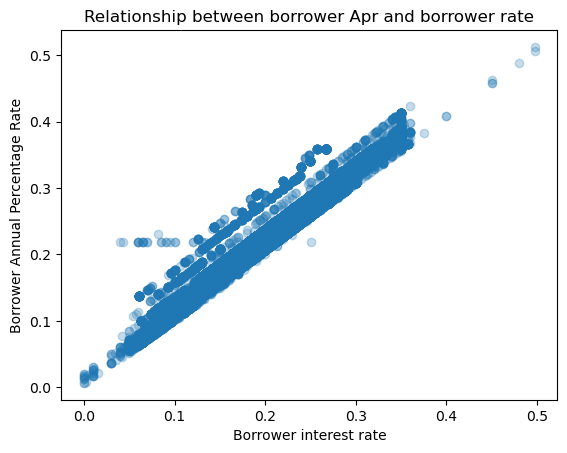

In [21]:
sb.regplot(data = df_loan, x = 'BorrowerRate', y = 'BorrowerAPR', fit_reg = False, scatter_kws={'alpha':5/20})
plt.ylabel('Borrower Annual Percentage Rate')
plt.xlabel('Borrower interest rate')
plt.title('Relationship between borrower Apr and borrower rate');

> The relationship between the 'BorrowerRate' and the 'BorrowerAPR' has and upward trend.

## Comparison of Loan Status with verified and unverified income

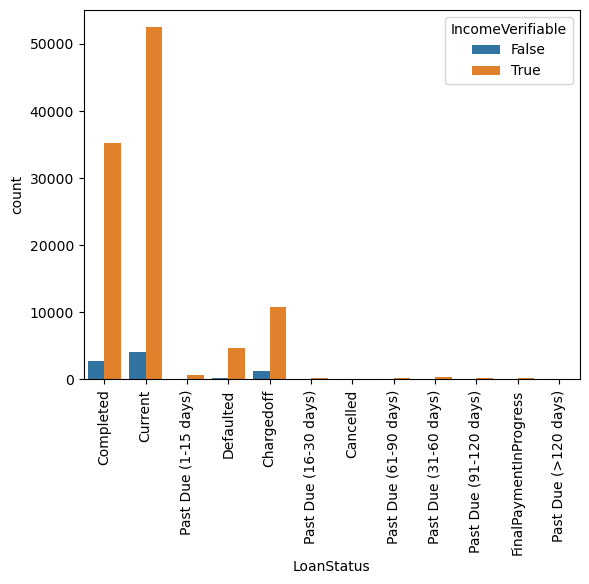

In [22]:
sb.countplot(data = df_loan, x  = 'LoanStatus', hue = 'IncomeVerifiable')
plt.xticks(rotation = 90);

- The category of people whom loan are mostly given to are those that have a verifiable source of income, for increased chance of securing a loan. one has to provide a verifiable source of income

## Trends of Loan Amount by Year

In [23]:
loan_amount = df_loan.groupby(['year'])['LoanOriginalAmount'].mean()
loan_amount

year
2005     3576.681818
2006     4763.325262
2007     7049.545026
2008     6021.628289
2009     4354.858818
2010     4766.540340
2011     6692.021108
2012     7833.842173
2013    10545.065599
2014    11912.219520
Name: LoanOriginalAmount, dtype: float64

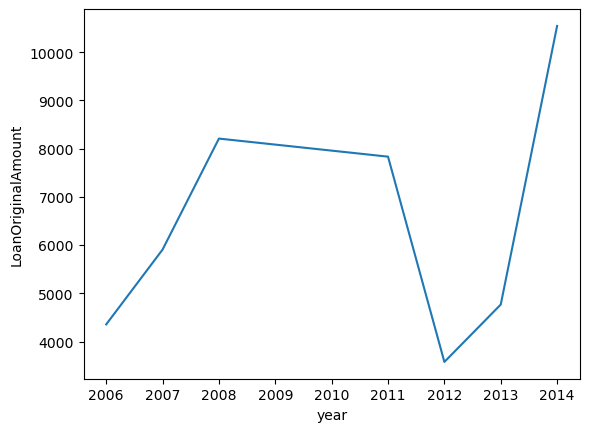

In [24]:
# plots the pointplot for year vs BorrowerRate
sb.lineplot(data=df_loan, x='year', y=loan_amount, ci=None)
plt.yticks;

- The year in which borrower's mostly sourced for loan is 2014, followed by 2008, then 2011.

## Trends of Intrest Rate by Year

In [25]:
Average_rate = df_loan.groupby(['year'])['BorrowerRate'].mean()
Average_rate

year
2005    0.093702
2006    0.191384
2007    0.176583
2008    0.186136
2009    0.192922
2010    0.212778
2011    0.229982
2012    0.220027
2013    0.183535
2014    0.153733
Name: BorrowerRate, dtype: float64

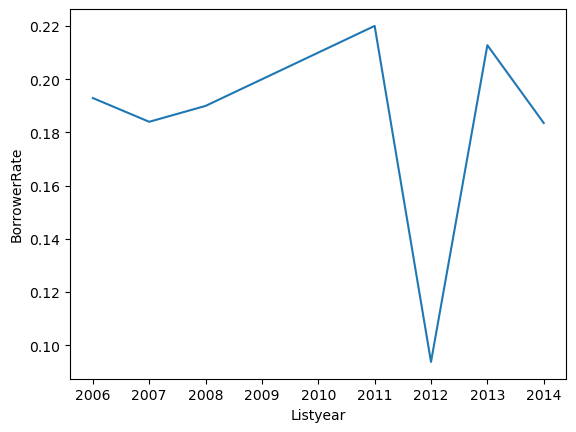

In [26]:
# plots the pointplot for year vs BorrowerRate
sb.lineplot(data=df_loan, x='Listyear', y=Average_rate, ci=None);

* From the plot above, the interest rate fluntuated over the years. 

## Monthly loan repayment by Employment status

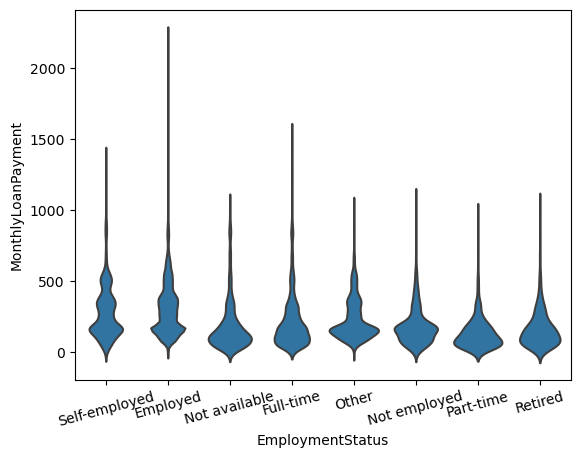

In [27]:
base_color = sb.color_palette()[0]
sb.violinplot(data=df_loan, x='EmploymentStatus', y='MonthlyLoanPayment', color = base_color, inner=None)
plt.xticks(rotation=15);

- From the plot the category of people by employement status that paid an increasingly high loan payment montly are the Employed


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the scatter plot, I found that the higher the Borrower rate the higher the Borrower APR.

> From the interest rate by year plot, 2011 to 2013 shows an unusual downward and upward in the intrest rate. Between 2011 and 2012 the interest rate reduced in an unusual manner. In addition, the intrest rate between 2012-2013 increased in an unusual manner


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The monthly loan paid across employment employment status are in the same category with few outliers

> The "trends of loan amount by year" plot shows that from 2012 there is an upward trend in the amount of loan given out.

> From the `Comparison of Loan Status with verified and unverified income` plot, it could be discerned that loan are mostly given to those with verifiable source of income. For the borrower to increase his/her chances of securing a loan, they have to provide a verifiable source of income.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

## Evolution of BorrowerRate by Terms of the loan over the years

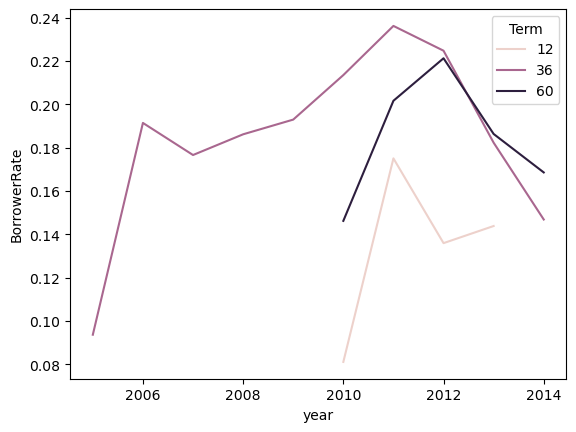

In [28]:
# plots the lineplot to analyze BorrowerAPR by Term over years
g=sb.lineplot(data=df_loan, x='year', y='BorrowerRate', hue='Term',ci=None);

> From the plot above, one could deduce that when the term is set at 12 months the interest will be low

In [29]:
np.random.seed(2018)
sample = np.random.choice(df_loan.shape[0], 2000, replace = False)
df_loan_subset = df_loan.loc[sample]

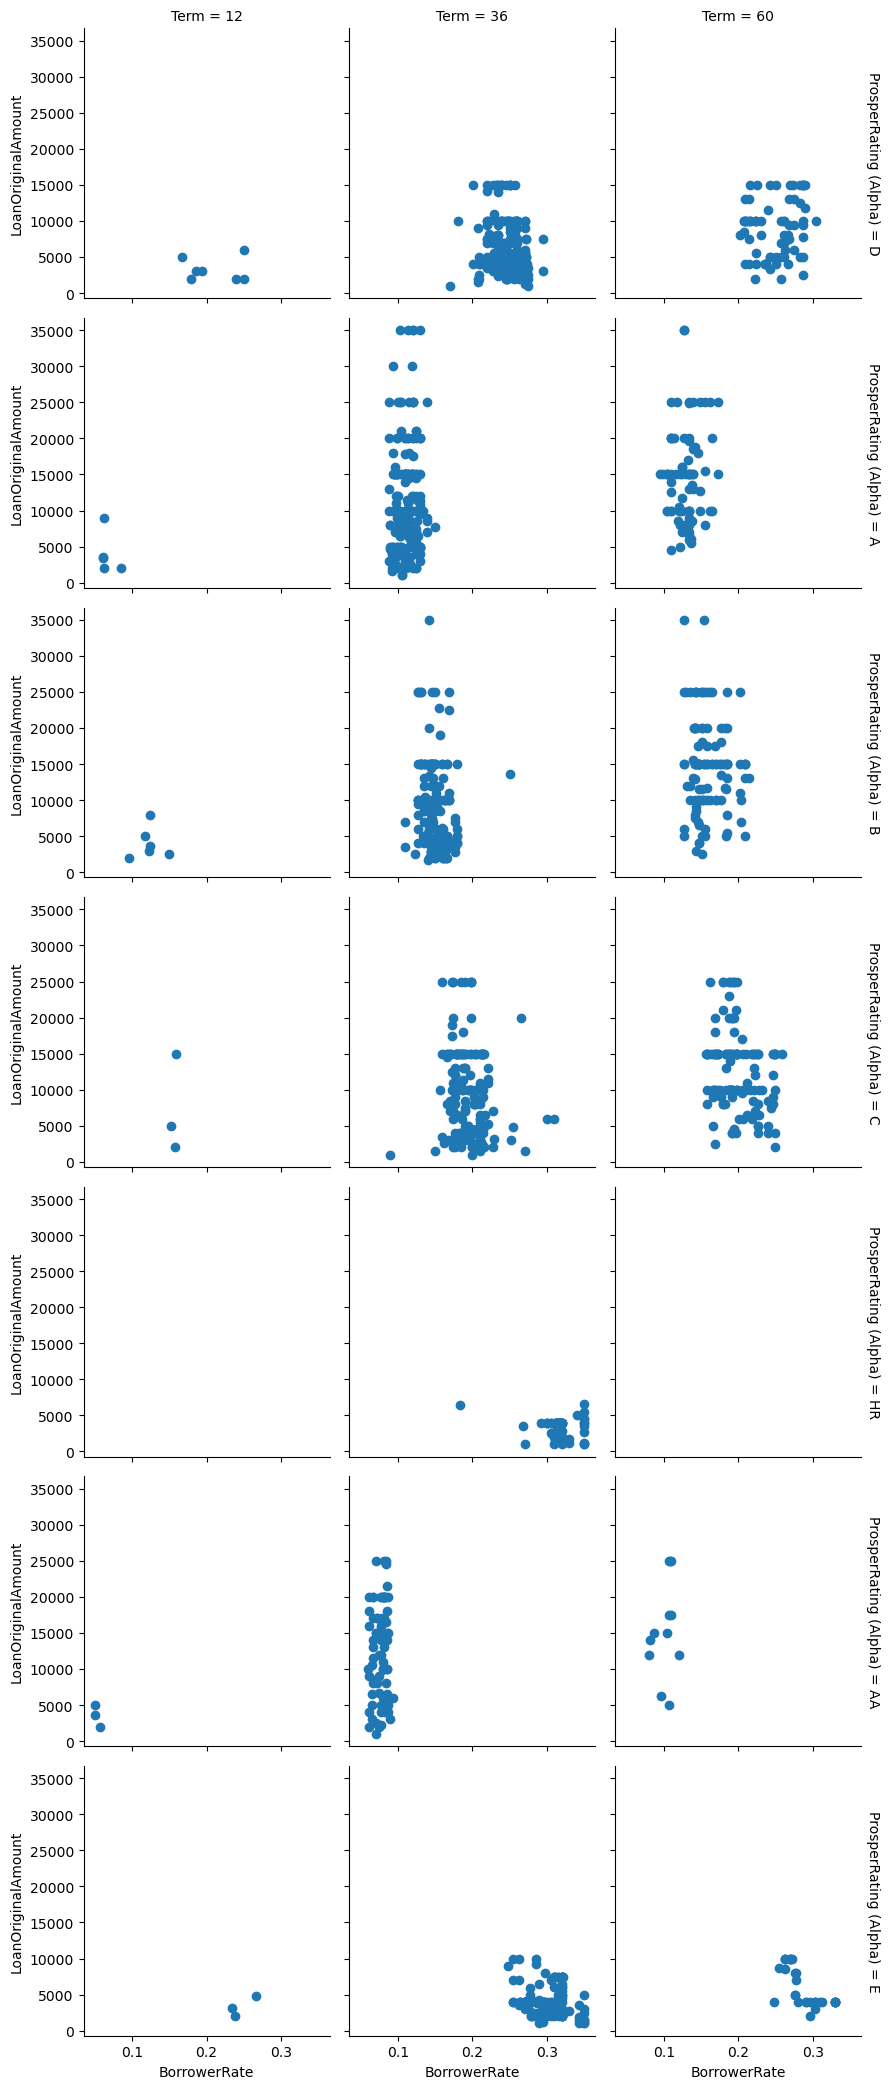

In [30]:
g = sb.FacetGrid(data = df_loan_subset, col = 'Term', row = 'ProsperRating (Alpha)', margin_titles = True)
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount');

> The interesting take away from this plot is that the rating has an effect on the Borrower Rate

- In this section, I will investigate relationships between pairs of variables in your data. First, I will examine the pairwise correlations between the numeric features that we are interested in.

## Numeric Variables Observation

In [31]:
num_var = ['DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'BorrowerRate']

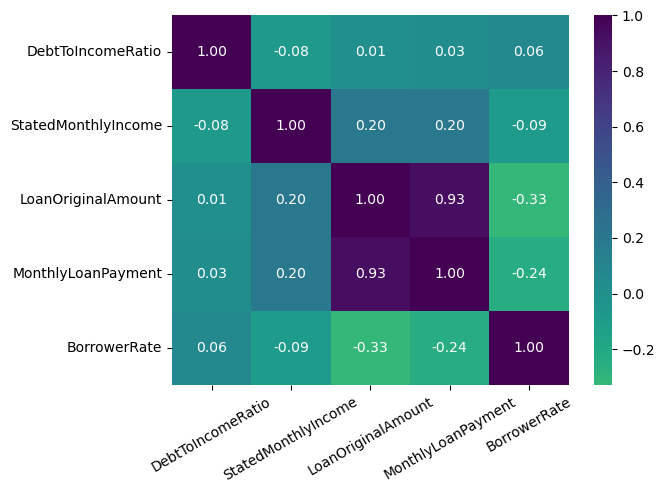

In [32]:
sb.heatmap(df_loan[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30);

* There is a strong relationship between the loan original amount and monthly loan payment
* The statedmonthly income has a negative relationship with debt to income ratio

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The rating of an individual affect the interest rate, a good ratings tranlate to a low interest rate.

> The shortest loan term has the lowest intrest.

> In conlusion, the borrower rate has a negative relationsip with the Monthy loan payment


### Were there any interesting or surprising interactions between features?

> I found that loans with a term 36 months largerly has higher intrest rate that loan with 60 months, except for 2014

In [92]:
# Converting this report to html format
from subprocess import call
call(['python', '-m', 'nbconvert', 'exploration_template.ipynb'])

4294967295